In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
URL_BASE = 'https://raw.githubusercontent.com/ab-courses/simulator-ab-datasets/main/2022-04-01/'
def read_database(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name))


In [40]:
df_sales = read_database('2022-04-01T12_df_sales.csv')
df_web_logs = read_database('2022-04-01T12_df_web_logs.csv')
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_web_logs['date'] = pd.to_datetime(df_web_logs['date'])

In [41]:
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203847 entries, 0 to 203846
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   sale_id      203847 non-null  int64         
 1   date         203847 non-null  datetime64[ns]
 2   count_pizza  203847 non-null  int64         
 3   count_drink  203847 non-null  int64         
 4   price        203847 non-null  int64         
 5   user_id      203847 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.3+ MB


In [42]:
df_sales.head()

,sale_id,date,count_pizza,count_drink,price,user_id
0,1000001,2022-02-04 10:00:24,1,0,720,1c1543
1,1000002,2022-02-04 10:02:28,1,1,930,a9a6e8
2,1000003,2022-02-04 10:02:35,3,1,1980,23420a
3,1000004,2022-02-04 10:03:06,1,1,750,3e8ed5
4,1000005,2022-02-04 10:03:23,1,1,870,cbc468


In [43]:
df_sales.describe()

,sale_id,count_pizza,count_drink,price
count,2.038470e+05,203847.000000,203847.000000,203847.000000
mean,1.101924e+06,1.675879,0.367226,1206.014364
std,5.884570e+04,1.065426,0.584551,778.476884
min,1.000001e+06,1.000000,0.000000,540.000000
25%,1.050962e+06,1.000000,0.000000,720.000000
50%,1.101924e+06,1.000000,0.000000,840.000000
75%,1.152886e+06,2.000000,1.000000,1500.000000
max,1.203847e+06,18.000000,7.000000,13230.000000


In [44]:
df_web_logs.head()

,user_id,page,date,load_time
0,f25239,m,2022-02-03 23:45:37,80.8
1,06d6df,m,2022-02-03 23:49:56,70.5
2,06d6df,m,2022-02-03 23:51:16,89.7
3,f25239,m,2022-02-03 23:51:43,74.4
4,697870,m,2022-02-03 23:53:12,66.8


In [45]:
df_web_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964507 entries, 0 to 1964506
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   user_id    object        
 1   page       object        
 2   date       datetime64[ns]
 3   load_time  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 60.0+ MB


In [46]:
df_web_logs.describe()

,load_time
count,1.964507e+06
mean,7.396452e+01
std,1.107026e+02
min,0.000000e+00
25%,6.180000e+01
50%,7.000000e+01
75%,7.810000e+01
max,4.197500e+03


### Merging tables

How often does a user visit the site and not buy anything that day?

In [47]:
df_web_logs['day']=df_web_logs['date'].dt.date
df_sales['day']=df_sales['date'].dt.date

In [48]:
df_web_logs.head(2)

,user_id,page,date,load_time,day
0,f25239,m,2022-02-03 23:45:37,80.8,2022-02-03
1,06d6df,m,2022-02-03 23:49:56,70.5,2022-02-03


In [49]:
user_day_web=df_web_logs[['user_id','day','page']].groupby(['user_id','day']).count()
user_day_sale=df_sales[['user_id','day','price']].groupby(['user_id','day']).sum()
user_day_web.head(2)

page
user_id day             
000096  2022-03-04     8
        2022-03-22     7

In [50]:
user_day_sale.head(2)

price
user_id day              
000096  2022-03-04    720
        2022-03-22    720

In [51]:
df2=pd.merge(
    user_day_web,
    user_day_sale,
    how='outer',
    left_index=True,
    right_index=True
    )

In [52]:
df2.head()

page  price
user_id day                    
000096  2022-03-04     8  720.0
        2022-03-22     7  720.0
0000d4  2022-02-28     9  720.0
        2022-03-27    10  720.0
0000de  2022-02-11     6  660.0

In [53]:
df2.isnull().mean()
# 33% of customers visited the website, but didn't buy anything 

page     0.000000
price    0.329802
dtype: float64

### Tasks

In [54]:
# 40% of orders have a value greater than 1000  each. Suppose a new order costs more than 1000  with probability 0.4. 
# Estimate the probability that out of 100 new orders 50 or more cost more than 1000 .
values=np.random.binomial(100,0.4,size=1000000)
answer=(values>=50).mean()
print('answer',round(answer,3))


answer 0.027


(array([4.20000e+01, 2.31400e+03, 2.23570e+04, 1.55191e+05, 2.82609e+05,
        3.58542e+05, 1.51965e+05, 2.38120e+04, 3.08400e+03, 8.40000e+01]),
 array([17. , 21.6, 26.2, 30.8, 35.4, 40. , 44.6, 49.2, 53.8, 58.4, 63. ]),
 <BarContainer object of 10 artists>)

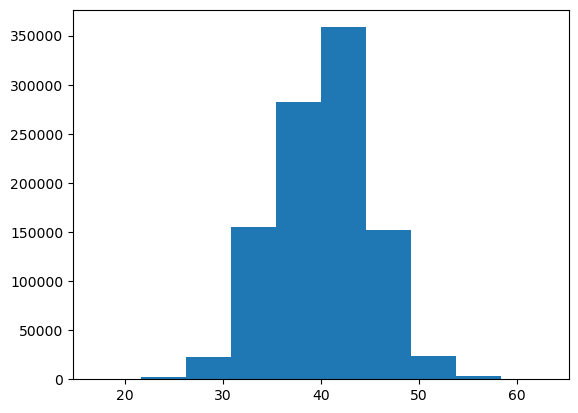

In [55]:
plt.hist(values)

#### Identify the top 3 products by total revenue.

In [56]:

URL_BASE = 'https://raw.githubusercontent.com/ab-courses/simulator-ab-datasets/main/2022-04-01/'
def read_database(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name))

df_sales_detail = read_database('2022-04-01T12_df_sales_detail.csv')
df_sales_detail['date']=pd.to_datetime(df_sales_detail['date'])



In [57]:
df_sales_detail.head(2)

,sale_id,good,price,date,user_id
0,1000001,mexican pizza,720,2022-02-04 10:00:24,1c1543
1,1000002,chefs pizza,840,2022-02-04 10:02:28,a9a6e8


In [58]:
top_revenue=(
    df_sales_detail.groupby('good')['price'].sum().sort_values(ascending=False).iloc[:3].index.tolist()
    ) 
print("top 3 goods by revenue",top_revenue)

top 3 goods by revenue ['chefs pizza', 'double pepperoni pizza', 'chicken bbq pizza']


### Estimate the average time that passes from a user entering the site to making a purchase. 
We will assume that a visit to the site is a purchase if it was made not earlier than two hours before the purchase.

In [59]:
from datetime import timedelta

In [60]:
df3=pd.merge(
    df_sales[['user_id','date']].rename(columns={'date':'date_sale'}),
    df_web_logs[['user_id','date']].rename(columns={'date':'date_enter'}),
    on='user_id',
    how='inner'
)

In [61]:
df3.head()

,user_id,date_sale,date_enter
0,1c1543,2022-02-04 10:00:24,2022-02-04 09:50:02
1,1c1543,2022-02-04 10:00:24,2022-02-04 09:51:16
2,1c1543,2022-02-04 10:00:24,2022-02-04 09:52:58
3,1c1543,2022-02-04 10:00:24,2022-02-04 09:57:04
4,1c1543,2022-02-04 10:00:24,2022-02-04 09:57:28


In [62]:
# delete rows where customer visited site 2 hours (& more) before bying 
df3=df3[
    (df3['date_enter']>=df3['date_sale']-timedelta(hours=2)) & (df3['date_enter']<df3['date_sale'])
].copy()

In [69]:
# time of the first visit
df3_first_visit=df3.groupby(['user_id','date_sale'])[['date_enter']].min().reset_index()
# calculate time in seconds
df3_first_visit['delta']=(df3_first_visit['date_sale']-df3_first_visit['date_enter']).dt.total_seconds()
# calculate average time in minutes 

answer=round(df3_first_visit['delta'].mean()/60)
print('average time that passes from a user entering the site to making a purchase:',answer, 'min')

average time that passes from a user entering the site to making a purchase: 17 min


In [72]:
### function to get data 
def get_data_subset(df, begin_date, end_date, user_ids=None, columns=None):
    if begin_date:
        df = df[df['date'] >= begin_date]
    if end_date:
        df = df[df['date'] < end_date]
    if user_ids:
        df = df[df['user_id'].isin(user_ids)]
    if columns:
        df = df[columns]
    return df.copy()

In [70]:
from datetime import datetime

In [75]:
df_example=get_data_subset(df_sales,datetime(2022,3,1),datetime(2022,4,23))
df_example.head()

,sale_id,date,count_pizza,count_drink,price,user_id,day
91777,1091778,2022-03-01 10:00:29,3,2,2130,043908,2022-03-01
91778,1091779,2022-03-01 10:00:36,2,1,1500,ad7128,2022-03-01
91779,1091780,2022-03-01 10:02:11,4,0,2700,79ab41,2022-03-01
91780,1091781,2022-03-01 10:04:55,1,0,840,3f94bc,2022-03-01
91781,1091782,2022-03-01 10:05:49,3,0,2160,7cbf72,2022-03-01


In [82]:
def get_response_time(df_web_logs, begin_date, end_date):
    return (
        get_data_subset(df_web_logs, begin_date, end_date, None, ['user_id', 'load_time'])
        .rename(columns={'load_time': 'metric'})
        [['user_id', 'metric']]
    )

    
df_example2=get_response_time(df_web_logs,datetime(2022,3,1),datetime(2022,4,23))
df_example2.head()

,user_id,metric
885082,434cf2,69.8
885083,80fa93,86.3
885084,434cf2,58.0
885085,a0aaab,85.2
885086,a22f92,92.5


In [83]:
def get_revenue_web(df_sales, df_web_logs, begin_date, end_date):
    df_users = (
        get_data_subset(df_web_logs, begin_date, end_date, None, ['user_id'])
        .drop_duplicates()
    )
    df = (
        get_data_subset(df_sales, begin_date, end_date, None, ['user_id', 'price'])
        .groupby('user_id')[['price']].sum().reset_index() 
        .rename(columns={'price': 'metric'})
    )
    df = pd.merge(df_users, df, on='user_id', how='left').fillna(0)
    return df[['user_id', 'metric']]

In [84]:
df_example3=get_revenue_web(df_sales, df_web_logs,datetime(2022,3,1),datetime(2022,4,23))
df_example3.head()

,user_id,metric
0,434cf2,3150.0
1,80fa93,0.0
2,a0aaab,0.0
3,a22f92,0.0
4,b5f198,0.0


In [85]:
# get revenue for all users 

def get_revenue_all(df_sales, df_web_logs, begin_date, end_date):
    df_users = (
        get_data_subset(df_web_logs, None, end_date, None, ['user_id'])
        .drop_duplicates()
    )
    df = (
        get_data_subset(df_sales, begin_date, end_date, None, ['user_id', 'price'])
        .groupby('user_id')[['price']].sum().reset_index() 
        .rename(columns={'price': 'metric'})
    )
    df = pd.merge(df_users, df, on='user_id', how='left').fillna(0)
    return df[['user_id', 'metric']]

In [86]:
df_example4=get_revenue_all(df_sales, df_web_logs,datetime(2022,3,1),datetime(2022,4,23))
df_example4.head()

,user_id,metric
0,f25239,1560.0
1,06d6df,1470.0
2,697870,840.0
3,2edd8e,0.0
4,25025e,0.0
